In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set()
sns.set(style="darkgrid")

In [3]:

df = pd.read_excel('KPMG.xlsx', sheetname="CustomerDemographic",skiprows=1)

df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [5]:
df['last_name']=df['last_name'].fillna(method='ffill')

In [6]:
df['DOB']=df['DOB'].fillna(method='ffill')

In [7]:
df['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Legal Assistant                         41
Recruiting Manager                      41
General Manager                         40
Associate Professor                     39
Structural Engineer                     39
Sales Representative                    38
Junior Executive                        38
Desktop Support Technician              38
Executive Secretary                     37
Dental Hygienist                        37
Senior Financial Analyst                37
Chemical Engineer                       37
Technical Writer                        37
Senior Developer                        36
Cost Accountant                         36
Product Engineer                        36
Registered Nurse                        36
Assistant Professor                     36
Food Chemist                            35
Administrat

In [8]:
df['job_title']=df['job_title'].fillna(method='bfill')

In [9]:
df['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [10]:
df['job_industry_category']=df['job_industry_category'].fillna(method='ffill')

In [11]:
df['tenure']=df['tenure'].fillna(method='ffill')

In [12]:
del df['default']

In [13]:
df["owns_car"].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [14]:
df.head(1)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0


In [15]:
df['tenure'].mean()

10.66525

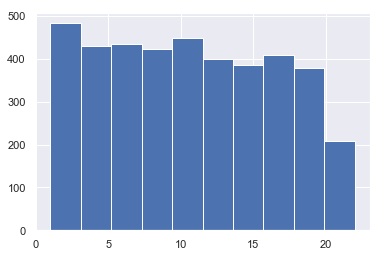

In [55]:
df['tenure'].hist()

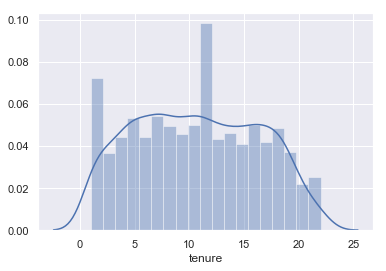

In [54]:
sns.distplot(df['tenure'])

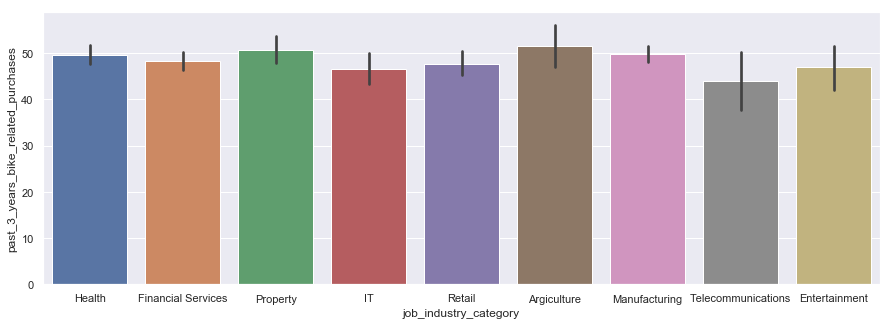

In [69]:
plt.figure(figsize=(15,5))
sns.barplot(x="job_industry_category", y='past_3_years_bike_related_purchases', data=df)

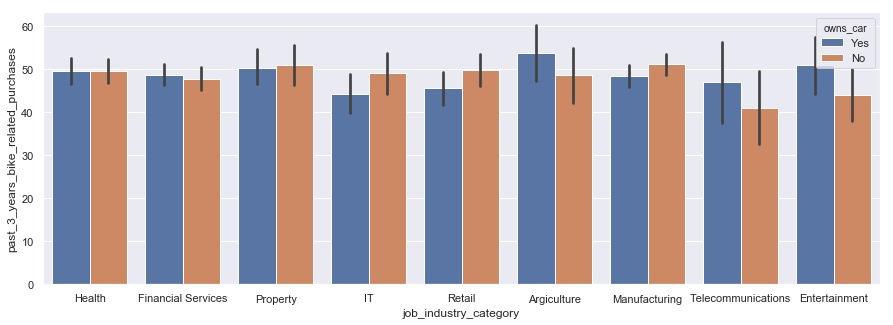

In [60]:
plt.figure(figsize=(15,5))
sns.barplot(x="job_industry_category", y='past_3_years_bike_related_purchases',hue='owns_car', data=df)

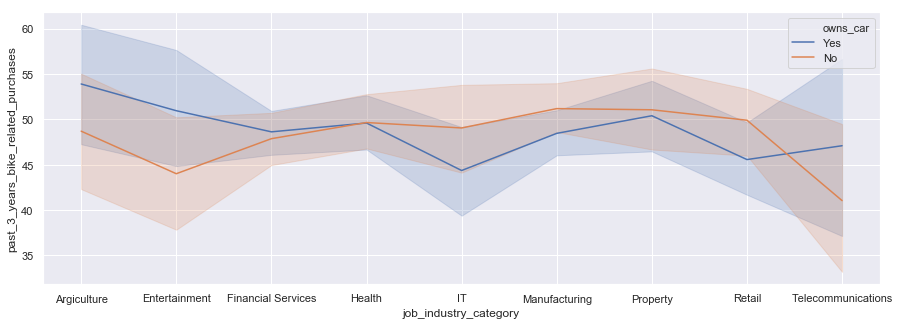

In [75]:
plt.figure(figsize=(15,5))
sns.lineplot(x="job_industry_category", y='past_3_years_bike_related_purchases',hue='owns_car', data=df)

[2039, 1873, 88]


([<matplotlib.axis.XTick at 0x1cf9bc2c668>,
 <a list of 6 Text xticklabel objects>)

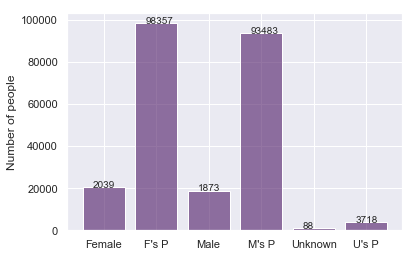

In [19]:
#Analyze the Gender vs Bikes bought
#array(['F', 'Male', 'Female', 'U', 'Femal', 'M'] from KPMG_VI.py
gender = [0,0,0] #first is Female, second if Male, third is Unknown
for each in df['gender']:
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1

print(gender)
def gf(x, pos):
    #'The two args are the value and gender'
    return int(x)

bike = [0,0,0]
bike[0] += df['past_3_years_bike_related_purchases'][df['gender'] == 'Female'].sum() + df['past_3_years_bike_related_purchases'][df['gender'] == 'F'].sum()
bike[1] += df['past_3_years_bike_related_purchases'][df['gender'] == 'Male'].sum() + df['past_3_years_bike_related_purchases'][df['gender'] == 'M'].sum()
bike[2] += df['past_3_years_bike_related_purchases'][df['gender'] == 'U'].sum()

grapho = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graphl = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
colorr = (0.3,0.1,0.4,0.6)
#scale up gender by 10 for easier visualization
formatter = FuncFormatter(gf)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graphl, color = colorr)
for i in range(len(gender*2)):
    plt.text(x = i-0.2, y = graphl[i]+0.1, s = grapho[i], size = 10)

plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))


([<matplotlib.axis.XTick at 0x1cf9bcb9470>,
 <a list of 3 Text xticklabel objects>)

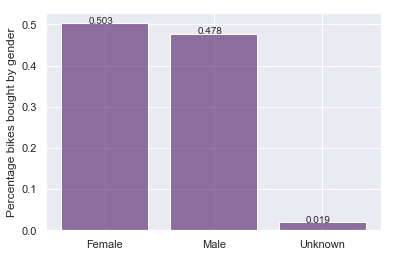

In [20]:
avg  = [0,0,0]
ss   = sum(bike)
for i in range(len(avg)):
    avg[i] += round(bike[i]/ss,3) 

x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by gender')
plt.bar(x1, avg, color = colorr)
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unknown'))

In [22]:
#check_unique()["Category"]
df["job_industry_category"].value_counts()

Manufacturing         959
Financial Services    926
Health                720
Retail                433
Property              320
IT                    273
Entertainment         158
Argiculture           129
Telecommunications     82
Name: job_industry_category, dtype: int64

([<matplotlib.axis.XTick at 0x1cf9bcfca58>,
 <a list of 9 Text xticklabel objects>)

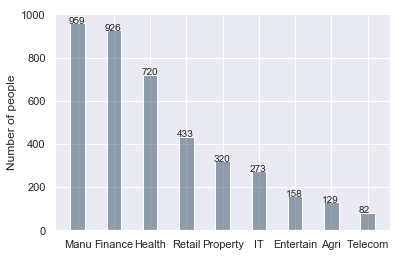

In [23]:
val = [959, 926, 720, 433, 320, 273, 158, 129, 82]
colorr = (0.2,0.3,0.4,0.5)

x3 = np.arange(9)
fig3, ax3 = plt.subplots()
ax3.set_ylabel('Number of people')
plt.bar(x3, val, color = colorr, width = 0.4)
for i in range(len(val)):
    plt.text(x = i-0.25, y = val[i]+0.1, s = val[i], size = 10)

plt.xticks(x3, ("Manu", "Finance", "Health", "Retail", "Property", "IT", "Entertain", "Agri", "Telecom"))